### Multi-layer Perceptron Exercise
#### In this exercise, we will implement the multi-perceptron algorithm with two hidden layers. 
#### The implementation of the MLP algorithm will be in the mlp.py file but you will test your implementation 
#### in this notebook. In this exercise we will use the MNIST dataset that we used for week 2 lab (KNN). 

In [27]:
# importing the MLP algorithm from mlp.py file 
# where you will implement the MLP algorithm 
from mlp import MLP 
import numpy as np

# This is to reload all changed modules every time before executing a new line.
# https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
# loading the MNIST datatset
import pickle, gzip

f = gzip.open('mnist.pkl.gz','rb')
tset, vset, teset = pickle.load(f, encoding='latin1')
print(tset[0].shape, vset[0].shape, teset[0].shape)
f.close()

(50000, 784) (10000, 784) (10000, 784)


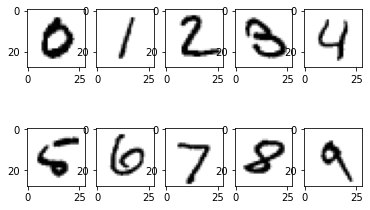

In [29]:
import matplotlib.pyplot as plt # To install: pip install matplotlib

# visualise some examples from the dataset 
fig, ax = plt.subplots(2,5)
for i, ax in enumerate(ax.flatten()):
    im_idx = np.argwhere(teset[1] == i)[0]
    plottable_image = np.reshape(teset[0][im_idx], (28, 28))
    ax.imshow(plottable_image, cmap='gray_r')

In [30]:
# we will use only 9000 images for training and 1000 for testing 

# Just use the first 9000 images for training 
tread = 9000
train_in = tset[0][:tread,:]

# This is a little bit of work -- 1 of N encoding
# Make sure you understand how it does it
train_tgt = np.zeros((tread,10))
for i in range(tread):
    train_tgt[i,tset[1][i]] = 1

# and use 1000 images for testing
teread = 1000
test_in = teset[0][:teread,:]
test_tgt = np.zeros((teread,10))
for i in range(teread):
    test_tgt[i,teset[1][i]] = 1

#### Initialise the MLP classifier 

In [31]:
# We choose the first and second hidden layers to have 5 neurons each.
sizes = [784,5,5,10] # 784 is the number of pixels of the images and 10 is the number of classes 
classifier = MLP(sizes)

# print(classifier.beta,classifier.momentum,classifier.nin, classifier.nhidden1, classifier.nhidden2, classifier.nout)
# print(classifier.weights1.shape)
# print(classifier.weights2.shape)
# print(classifier.weights3.shape)


In [32]:
# TODO: open the mlp.py file and implement self.forwardPass and self.train methods
# test your implementation here 
# for now, let's keep the learning rate and the number of iterations unchanged  
classifier.train(train_in, train_tgt, 0.1, 1000)
#print(classifier.hidden1.shape)
#print(classifier.hidden2.shape)

Iteration:  0  Error:  4120.308899904165


/Users/shengdaolin_sh/dir_developer/workspaces/pycharm/acs-project-machine_learning/assessments/Courework1-Muti-layer Neural Networks/cw1/mlp.py:138: RuntimeWarning: overflow encountered in exp
  self.hidden2 = np.concatenate((self.hidden2, -np.ones((np.shape(self.hidden1)[0], 1))), axis=1)  # (9000,6)


Iteration:  100  Error:  8101.0
Iteration:  200  Error:  8101.0
Iteration:  300  Error:  8101.0
Iteration:  400  Error:  8101.0
Iteration:  500  Error:  8101.0
Iteration:  600  Error:  8101.0
Iteration:  700  Error:  8101.0
Iteration:  800  Error:  8101.0
Iteration:  900  Error:  8101.0


In [33]:
# we evaluate our model on the testing set 
# and show the confusion matrix and the accuracy
classifier.evaluate(test_in, test_tgt)

The confusion matrix is:
[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 85. 126. 116. 107. 110.  87.  87.  99.  89.  94.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
The accuracy is  11.0


In [8]:
# you should expect the accuracy to be really low ~ most likely less than %50
# I think we can do better by experimenting with different learning rate and 
# number of neurons in each hidden layer. 

In [9]:
# TODO: modify the network parameters to get the test accuracy above %90 
# you can change the learning rate, the number of neurons of each hidden layer
# and number of iterations. You can also implement the gradient descent algorithm
# with momentum and experiment it with different momentum values. 

In [42]:
best_sizes = [784,50,50,10]
best_beta = 1
best_momentum = 0.9
best_lr = 0.001 # best learning rate
best_niterations = 1200
best_classifier = MLP(sizes = best_sizes, beta=best_beta, momentum=best_momentum)
best_classifier.train(train_in, train_tgt, best_lr, best_niterations)
best_classifier.evaluate(test_in, test_tgt)

Iteration:  0  Error:  4093.3026386592255
Iteration:  100  Error:  322.82164131272924
Iteration:  200  Error:  106.60478844004166
Iteration:  300  Error:  50.75775914691323
Iteration:  400  Error:  36.498573697799834
Iteration:  500  Error:  27.09483420345857
Iteration:  600  Error:  22.10328366751846
Iteration:  700  Error:  17.29226065388398
Iteration:  800  Error:  14.672972106874482
Iteration:  900  Error:  13.313141730214376
Iteration:  1000  Error:  11.663833143555207
Iteration:  1100  Error:  10.978263538717298
The confusion matrix is:
[[ 82.   0.   2.   1.   0.   0.   4.   0.   1.   0.]
 [  0. 124.   1.   1.   0.   0.   0.   3.   0.   0.]
 [  0.   0. 101.   0.   1.   0.   0.   3.   2.   0.]
 [  0.   1.   0.  98.   0.   5.   0.   0.   1.   0.]
 [  1.   0.   0.   0. 103.   1.   3.   0.   1.   1.]
 [  1.   0.   0.   4.   0.  79.   0.   0.   0.   2.]
 [  1.   1.   1.   1.   0.   1.  80.   0.   0.   0.]
 [  0.   0.   4.   1.   0.   1.   0.  89.   1.   2.]
 [  0.   0.   5.   1.   1. 

In [43]:
# TODO: run the following code to save the best parameters and 
# the weights of the network that achieves the desired accuracy
best_parameters = {
    'sizes': best_sizes,
    'beta': best_beta,
    'momentum': best_momentum,
    'lr': best_lr,
    'niterations': best_niterations,
    'weights_1': best_classifier.weights1,
    'weights_2': best_classifier.weights2,
    'weights_3': best_classifier.weights3,
}

with open('best_classifier.pkl', 'wb') as handle:
    pickle.dump(best_parameters, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [44]:
best_parameters

{'sizes': [784, 50, 50, 10],
 'beta': 1,
 'momentum': 0.9,
 'lr': 0.001,
 'niterations': 1200,
 'weights_1': array([[-0.00661316, -0.00937695, -0.03142876, ...,  0.02768647,
          0.00115246, -0.00561046],
        [ 0.03364187,  0.01954069,  0.02274892, ...,  0.03102216,
         -0.02083129,  0.02326041],
        [ 0.018696  , -0.01136514, -0.0277163 , ..., -0.03004802,
          0.01230188,  0.02556829],
        ...,
        [-0.00546291,  0.00257467,  0.03482317, ..., -0.02482449,
         -0.02715763,  0.03008705],
        [-0.01874381, -0.01545277, -0.03422745, ..., -0.0252463 ,
          0.00332421,  0.02695031],
        [ 0.11000471,  0.39047774, -0.0395647 , ...,  0.20724647,
          0.55113842, -0.30104234]]),
 'weights_2': array([[ 1.16282435, -0.54376593, -0.62322534, ..., -0.34466175,
         -0.13756544, -0.18553681],
        [ 0.72960306, -0.37031609, -0.41476437, ...,  0.14899346,
         -0.16586589, -0.432442  ],
        [-0.49459616, -0.36997539,  0.88343151, 